In [2]:
# import according packages and Iris dataset
import numpy as np
import pandas as pd
from sklearn import datasets

ds = datasets.load_iris()

# check the description of Iris dataset
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# transfer data to dataframe
X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target

print(X.head())
print(y)

# observe data roughly (data cleaning if there's missing value)
print(X.info())
print()
print(X.isnull().sum())            # check if there's missing value
print()
print(X.describe())                # check statistical characteristic


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal wi

In [11]:
# skip feature engineering
# split data for training, testing
# make data unordered (See y is ordered which may cause training data not uniform)
from sklearn.model_selection import train_test_split
iris_split = train_test_split(X, y, test_size=0.2)
iris_split

[     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 49                 5.0               3.3                1.4               0.2
 101                5.8               2.7                5.1               1.9
 82                 5.8               2.7                3.9               1.2
 111                6.4               2.7                5.3               1.9
 95                 5.7               3.0                4.2               1.2
 109                7.2               3.6                6.1               2.5
 98                 5.1               2.5                3.0               1.1
 65                 6.7               3.1                4.4               1.4
 110                6.5               3.2                5.1               2.0
 43                 5.0               3.5                1.6               0.6
 46                 5.1               3.8                1.6               0.2
 15                 5.7               4.4           

In [12]:
# mapping split data to related name
iris_train_feature, iris_train_label = iris_split[0], iris_split[2]
iris_test_feature, iris_test_label = iris_split[1], iris_split[3]

In [13]:
# Select algorithm for classification: KNN, assign n=3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(iris_train_feature, iris_train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
clf.score(iris_test_feature, iris_test_label)                     # score for model with testing data

1.0

In [16]:
clf.predict([[5.2, 3.4, 1.4, 0.2], [6.1, 3.0, 4.9, 1.8], [6.8, 2.8, 4.8, 1.4]])  # predict with new data

array([0, 2, 1])

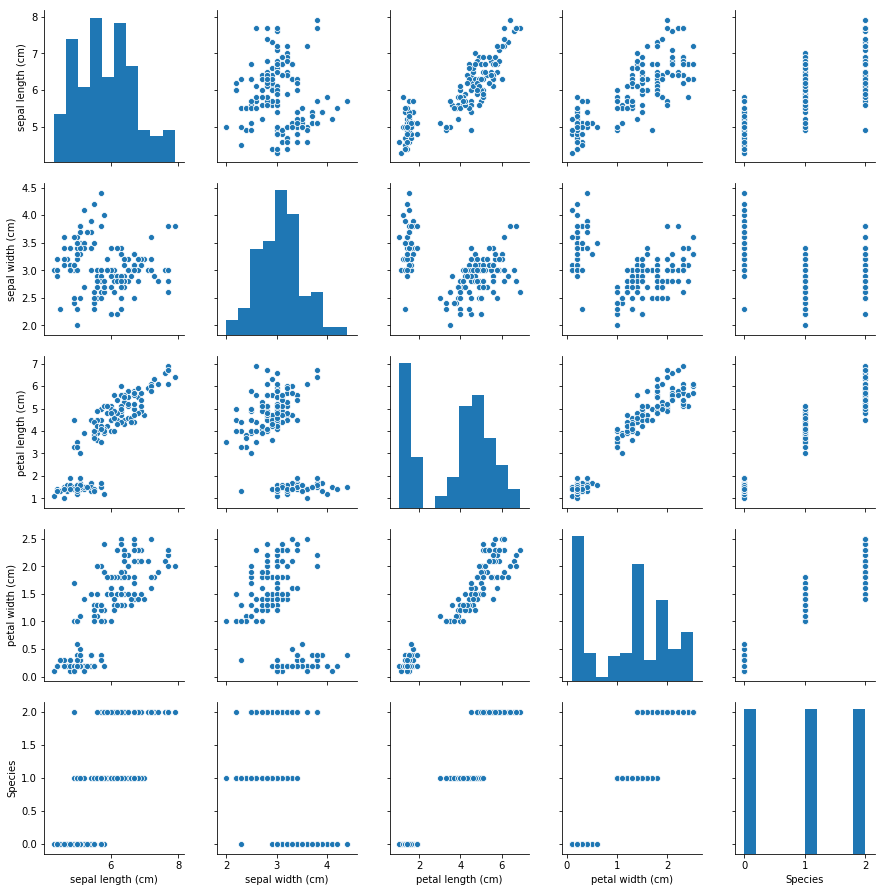

In [19]:
# pair plot between X and y
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris = X
iris['Species'] = y
#iris.head()

sns.pairplot(iris)
plt.show()